In [9]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas

In [120]:
import re
import pandas as pd
import matplotlib.pyplot as plt

DATE_TIME = re.compile(r"([(\[]).*?([)\]])")
AUTHOR = re.compile(r"((( [a-zA-ZöäüÖÄÜ]+)+):)")
LTR = chr(8206)


def to_pd_row(s):
    match = DATE_TIME.match(s)
    if match:
        g = match.group(0)
        date = g[1:9]
        time = g[11:-1]
        author = re.search(AUTHOR, s).group(0)[1:-1]
        message = s.split(': ')[1]
        return date, time, author, message.replace("\n", "")


def chat():
    filename = "./_chat.txt"
    try:
        with open(filename,newline='\r\n') as f:
            for l in f.readlines():
                yield to_pd_row(l.replace(LTR, ""))
            f.close()
    except Exception as e:
        print(f"Could not process {filename}, because the following error occured: {type(e).__name__}: {str(e)}")

df = pd.DataFrame(data=list(chat()), columns=["Date", "Time", "Author", "Message"])

# metrics
df = df[pd.notnull(df['Message'])]
df['Letter_Count'] = df['Message'].apply(lambda s : len(s))
df['Word_Count'] = df['Message'].apply(lambda s : len(s.split(' ')))

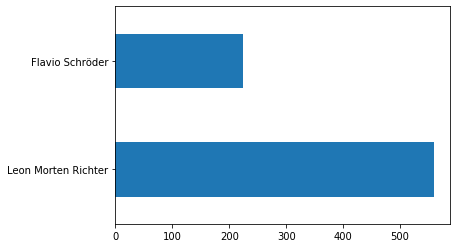

In [134]:
picture_df = df[df['Message'].str.contains('Bild weggelassen')]
picture_df['Author'].value_counts().plot.barh()

In [136]:
df[df['Word_Count']==df['Word_Count'].max()]


,Date,Time,Author,Message,Letter_Count,Word_Count
17392,01.09.19,13:07:32,Leon Morten Richter,// Implements a dictionary's functionality#inc...,3646,1186


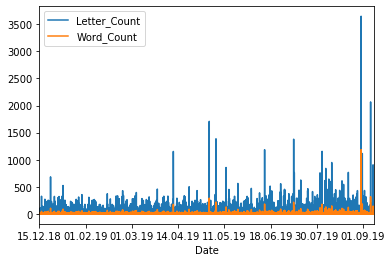

In [137]:
df.set_index('Date').plot()